In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
startup = pd.read_csv('./Dataset/50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [4]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


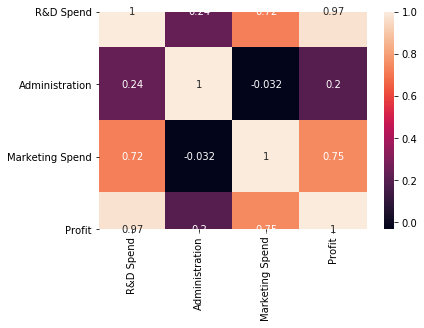

In [5]:
sns.heatmap(startup.corr(), annot =True)

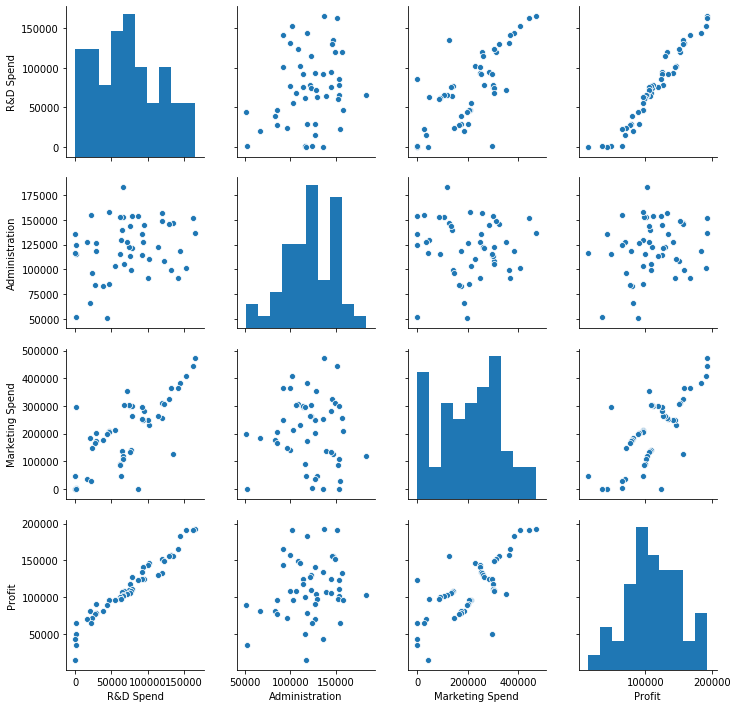

In [6]:
sns.pairplot(startup)

In [7]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
startup.shape

(50, 5)

In [10]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
#startup=startup.drop('State', axis=1)

In [12]:
#from sklearn.preprocessing import MinMaxScaler#
#scaler = MinMaxScaler()
#startup = scaler.fit_transform(startup)

In [13]:
#startup=pd.DataFrame(data=startup)

In [14]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

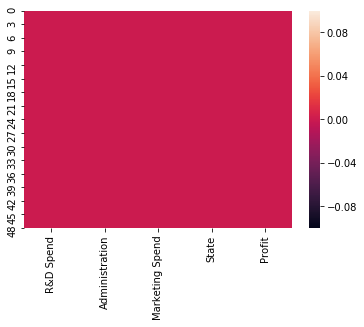

In [15]:
sns.heatmap(startup.isnull()) #visualize the null values in dataset if there is any change in distributed colour above the column name then there is a null value and hence we have to preprocess the dataset

In [16]:
### Categorical Features: Convert string type into numeric type. Here State is nominal feature
df = startup.iloc[:, :-1]
x = pd.get_dummies(df).values
y = startup.iloc[:, -1].values

In [17]:
## Splitting the dataset into train and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=5, 
                                                    random_state=0)

In [18]:
## Fitting Multiple linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lr.coef_   # slope

array([ 7.78395354e-01,  5.70695437e-03,  3.21344322e-02,  1.24850276e+02,
       -1.02835632e+03,  9.03506043e+02])

In [20]:
lr.intercept_  # intercept

46250.7372207336

In [21]:
## Predicting the test set result manually
coef = lr.coef_.reshape(-1,1)
np.dot(x_test, coef) + lr.intercept_

array([[101475.55240111],
       [133287.417583  ],
       [132546.1614474 ],
       [ 72702.7136192 ],
       [178346.51727008]])

In [22]:
## Predicting the test set result using predict() method
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [23]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39])

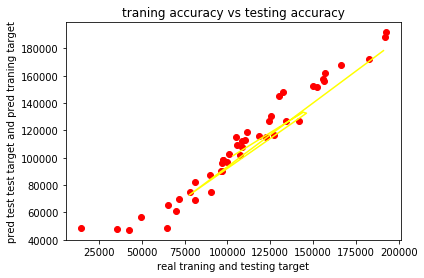

In [24]:
# Visualizing the test set
plt.scatter(y_train,y_pred_train,color='red') #testing data accuracy plot
plt.plot(y_test, y_pred_test,color='yellow')
plt.title('traning accuracy vs testing accuracy')
plt.xlabel('real traning and testing target')
plt.ylabel('pred test test target and pred traning target')
plt.show()
# multi linear regression plot traning vs testing

In [25]:
# Model Evaluation:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.94899164310162
0.9348094371060998


In [26]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.94899164310162
0.9348094371060998


In [27]:
# Prediction for an arbitrary value:
lr.predict([[10000, 30000, 50000, 1, 0, 0], [10000, 30000, 50000, 0, 1, 0],
           [10000, 30000, 50000, 0, 0, 1]])

array([55937.47127899, 54784.26468341, 56716.12704531])

#### If we want to improve accuracy, we can use feature selection.
- Since advertisement has 20% impact on profit hence dropping advertisement column.

In [28]:
del df['Administration']
df.head()

,R&D Spend,Marketing Spend,State
0,165349.20,471784.10,New York
1,162597.70,443898.53,California
2,153441.51,407934.54,Florida
3,144372.41,383199.62,New York
4,142107.34,366168.42,Florida


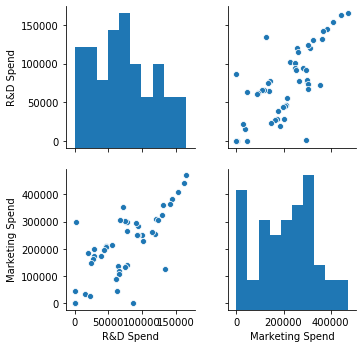

In [29]:
sns.pairplot(df)
#here we can see that noe after deleting the Administration column the plots or corr is about the 45 degree so this may be improve our result

In [30]:
x = pd.get_dummies(df).values
y = startup.iloc[:, -1].values
y=y.reshape(-1,1)

In [31]:
from sklearn.preprocessing import MinMaxScaler#
scaler = MinMaxScaler()
x=scaler.fit_transform(x)

In [32]:
from sklearn.preprocessing import MinMaxScaler#
scaler = MinMaxScaler()
y=scaler.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=5, 
                                                    random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


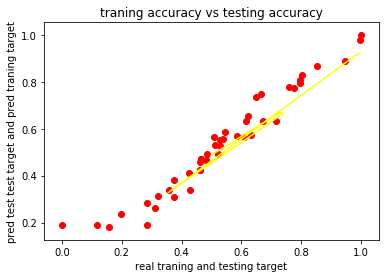

In [38]:
# Visualizing the test set
plt.scatter(y_train,y_pred_train,color='red') #testing data accuracy plot
plt.plot(y_test, y_pred_test,color='yellow')
plt.title('traning accuracy vs testing accuracy')
plt.xlabel('real traning and testing target')
plt.ylabel('pred test test target and pred traning target')
plt.show()
# multi linear regression plot traning vs testing

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.9365755604263573

Droping administration column has not improved our model accuracy significantly.